In [135]:
import sys
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

root_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))
fixcaps_path = os.path.join(root_dir, "FixCaps")
sys.path.append(fixcaps_path)

from Module import model501

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [136]:
train_dir = os.path.join(root_dir, "train")
val_dir = os.path.join(root_dir, "val")
test_dir = os.path.join(root_dir, "test")
print(train_dir)
print(val_dir)
print(test_dir)

d:\Code\NCKH2025\CNN\data\train
d:\Code\NCKH2025\CNN\data\val
d:\Code\NCKH2025\CNN\data\test


In [137]:
import os

def count_files_in_subfolders(root_dir):
    counts = {}
    for subset in ['train', 'val', 'test']:
        subset_path = os.path.join(root_dir, subset)
        file_count = 0
        if os.path.exists(subset_path):
            # Count files in the directory and its subdirectories
            for dirpath, dirnames, filenames in os.walk(subset_path):
                file_count += len(filenames)
            counts[subset] = file_count
    return counts

file_counts = count_files_in_subfolders(root_dir)

# Print the results
for subset, count in file_counts.items():
    print(f"{subset.capitalize()}: {count} files.")


Train: 8010 files.
Val: 2005 files.
Test: 1511 files.


In [138]:
def count_files_in_folder(root_dir, folder_name):
    train_path = os.path.join(root_dir, folder_name)
    file_counts = {}
    
    if os.path.exists(train_path):
        for dirpath, dirnames, filenames in os.walk(train_path):
            for dirname in dirnames:
                subfolder_path = os.path.join(dirpath, dirname)
                # Count only files in the subfolder
                file_count = len([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))])
                file_counts[dirname] = file_count
                
    return file_counts

def plot_distribution(folder_name):
    train_file_counts = count_files_in_folder(root_dir, folder_name)

    # Prepare data for the bar chart
    labels = list(train_file_counts.keys())
    values = list(train_file_counts.values())

    # Create a bar chart
    plt.figure(figsize=(10, 6))  # Set figure size
    bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

    # Add data labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

    # Add grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Set labels and title
    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Number of Datas', fontsize=12)
    plt.title(f"{folder_name} distribution", fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Show the plot
    plt.show()


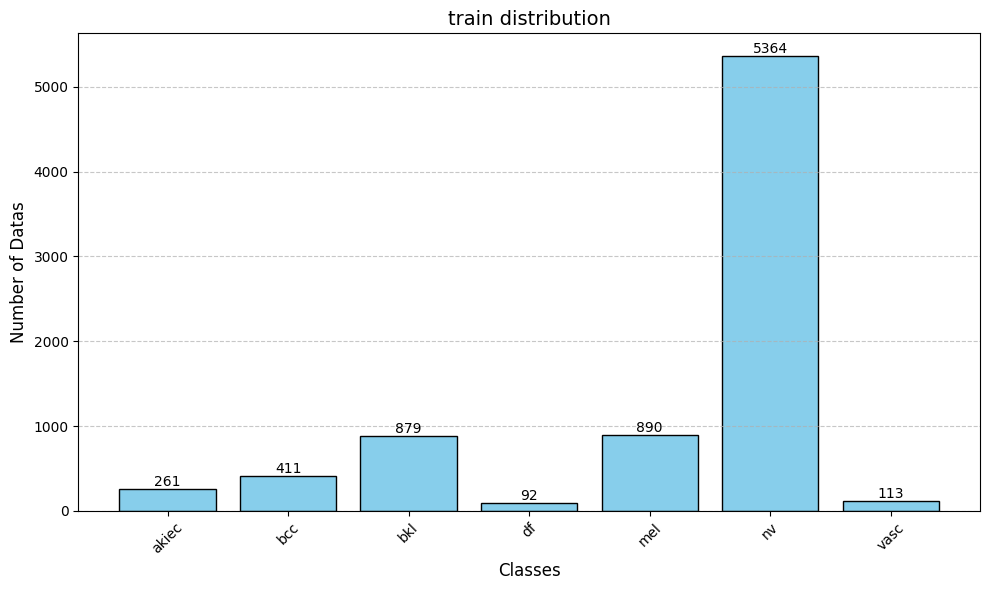

In [139]:
plot_distribution('train')

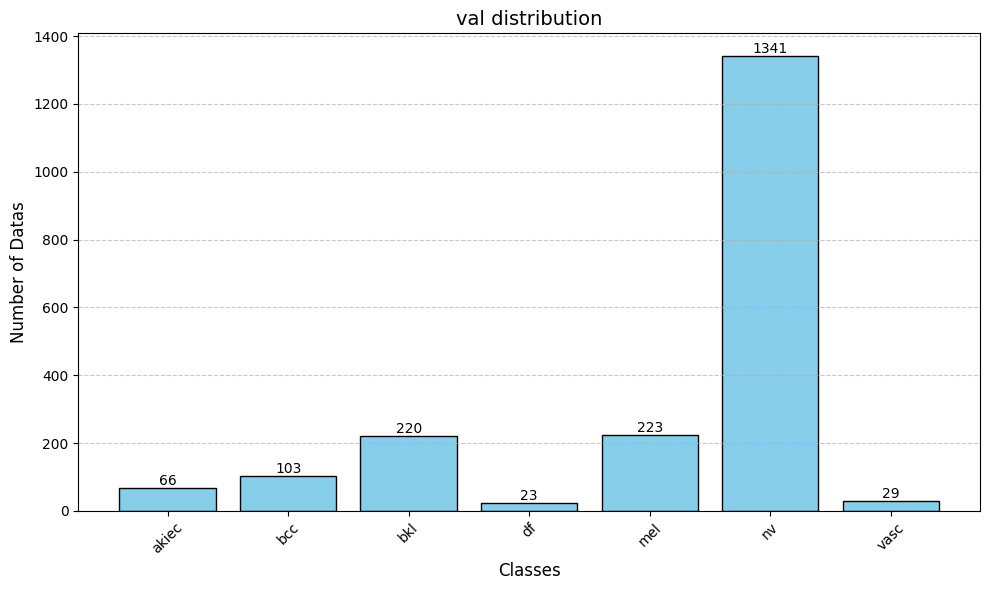

In [140]:
plot_distribution('val')

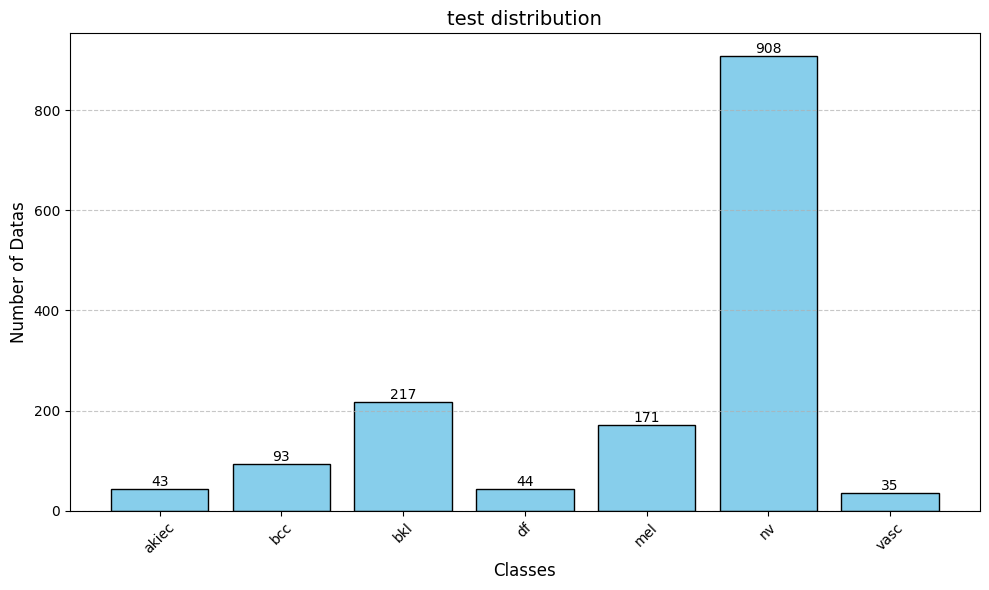

In [141]:
plot_distribution('test')

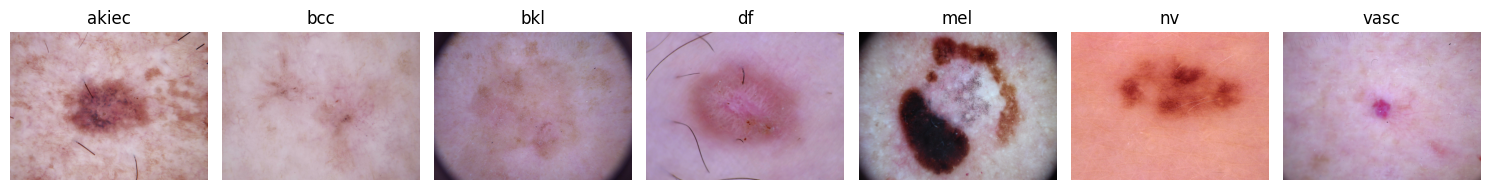

In [142]:
def load_one_image_per_class(root_dir):
    train_path = os.path.join(root_dir, 'train')
    images_per_class = {}
    
    if os.path.exists(train_path):
        for dirpath, dirnames, filenames in os.walk(train_path):
            for dirname in dirnames:
                subfolder_path = os.path.join(dirpath, dirname)
                # Get all image files in the subfolder
                image_files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
                if image_files:
                    # Randomly select one image
                    selected_image = random.choice(image_files)
                    images_per_class[dirname] = os.path.join(subfolder_path, selected_image)
                    
    return images_per_class

images_per_class = load_one_image_per_class(root_dir)

# Display the images in one line
plt.figure(figsize=(15, 5))  # Set the figure size
for i, (label, image_path) in enumerate(images_per_class.items()):
    img = mpimg.imread(image_path)  # Load the image
    plt.subplot(1, len(images_per_class), i + 1)  # Create a subplot for each image in one row
    plt.imshow(img)  # Display the image
    plt.title(label)  # Set the title as the class label
    plt.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()
